# Questão 4

Considere o processo de identificação de aglomerados (“clusters”) com base em uma técnica hierárquica aglomerativa. Neste problema considere o método de Ward resumido abaixo. Considere também dois critérios para parada do processo aglomerativo no dendograma e identificação do número de aglomerados. O critério $R^{2}$ e o critério do Pseudo $T^{2}$ . Para o problema considere a tabela de índices de desenvolvimento de países (Fonte: ONU-2002, Livro – Análise de dados através de métodos de estatística multivariada – Sueli A.Mingoti).

As colunas representam respectivamente: Expectativa de Vida, Educação, PIB e Estabilidade Política.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([0.88,0.90,0.90,0.87,0.93,0.89,0.88,0.81,0.82,0.85,0.77,0.71,0.75,0.70,0.44,0.47,0.23,0.34,0.31,0.24,0.76]) #Atributo 1
x2 = np.array([0.99,0.99,0.98,0.98,0.93,0.97,0.87,0.92,0.92,0.90,0.85,0.83,0.83,0.62,0.58,0.37,0.33,0.36,0.35,0.37,0.80])
x3 = np.array([0.91,0.93,0.94,0.97,0.93,0.92,0.91,0.80,0.75,0.64,0.69,0.72,0.63,0.60,0.37,0.45,0.27,0.51,0.32,0.36,0.61])
x4 = np.array([1.10,1.26,1.24,1.18,1.20,1.04,1.41,0.55,1.05,0.07,-1.36,0.47,-0.87,0.21,-1.36,-0.68,-1.26,-1.98,-0.55,0.20,0.39])

dados = []
for i,j,k,l in zip(x1,x2,x3,x4):
    dados.append([i,j,k,l])
dados = np.array(dados)
print(dados)

[[ 0.88  0.99  0.91  1.1 ]
 [ 0.9   0.99  0.93  1.26]
 [ 0.9   0.98  0.94  1.24]
 [ 0.87  0.98  0.97  1.18]
 [ 0.93  0.93  0.93  1.2 ]
 [ 0.89  0.97  0.92  1.04]
 [ 0.88  0.87  0.91  1.41]
 [ 0.81  0.92  0.8   0.55]
 [ 0.82  0.92  0.75  1.05]
 [ 0.85  0.9   0.64  0.07]
 [ 0.77  0.85  0.69 -1.36]
 [ 0.71  0.83  0.72  0.47]
 [ 0.75  0.83  0.63 -0.87]
 [ 0.7   0.62  0.6   0.21]
 [ 0.44  0.58  0.37 -1.36]
 [ 0.47  0.37  0.45 -0.68]
 [ 0.23  0.33  0.27 -1.26]
 [ 0.34  0.36  0.51 -1.98]
 [ 0.31  0.35  0.32 -0.55]
 [ 0.24  0.37  0.36  0.2 ]
 [ 0.76  0.8   0.61  0.39]]


# Funções usadas

In [2]:
def dist(a,b):
    '''Calcula distância entre ponto1 e ponto2. Ambos devem ser arrays do numpy.'''
    a=np.array(a); b=np.array(b)
    return np.sqrt(np.dot(a-b,a-b))


def centro(pontos):
    '''Calcula centróide de um conjunto de pontos.'''
    if len(pontos)==0:
        return []
    centroide = []
    pontos=np.array(pontos)
    for i in range(len(pontos[0])):
        soma = 0
        for j in range(len(pontos)):
            soma += pontos[j][i]
        centroide.append(soma/len(pontos)) 
    return np.array(centroide)


def menorPositivo(matriz, limiar_inf=0):
    '''Menor valor de uma matriz de reais positivos que é maior que um 
    determinado limiar inferior. O valor retornado é alterado na matriz para
    np.max(matriz)+1, preparando para a próxima vez que esta função é 
    executada.'''
    list_menor = []
    list_ind = []  # Índice impossível na matriz, np.unravel_index(np.argmin(matriz,axis=None), matriz.shape)
    n = len(matriz[0])-1
    for vez in range(n*(n+1)//2):
        menor = np.max(matriz) # valor impossível
        ind = (-1,-1)
        for i in range(len(matriz)):        # Percorrendo todos
            for j in range(len(matriz[0])): # elementos da matriz
                if i<j:  # Se está acima da diagonal principal
                    val = matriz[i][j]
                    if val<=menor and val>limiar_inf:
                        menor = val 
                        ind = (i,j)             
        if ind!=(-1,-1):
            list_menor.append(menor)
            list_ind.append(ind)
            matriz[list_ind[-1][0]][list_ind[-1][1]] = matriz[list_ind[-1][1]][list_ind[-1][0]] = np.max(matriz)+1
    return list_menor, list_ind


def R(clusters):
    # ni = número de elementos no conglomerado Ci
    # mi = centróide do conglomerado Ci
    # xi = amostra do conglomerado Ci
    # m = vetor média global
    media_glob = np.zeros(len(clusters[0][0]))
    qtd_pto = 0    
    for c in clusters:  # para cada cluster em 'clusters'
        for ponto in c: # para cada ponto em clusters
            media_glob+=ponto
            qtd_pto+=1
    media_glob = media_glob/qtd_pto
    centros = []  # lista com centroides de todos aglomerados
    for a in clusters:
        centros.append(centro(a))

    SSB = 0
    for i in range(len(clusters)):
        SSB += len(clusters[i])*prodEscalar(centros[i], media_glob)
    
    SST = 0
    for a in clusters:  # para cada Aglomerado em 'clusters'
        c = centro(a) # centróides
        for p in a:  # para cada Ponto do aglomerado
            SST += prodEscalar(p, c)
    return (SSB/SST)**2


def prodEscalar(a,b):
    '''Realiza o produto escalar do vetor <a-b>=<b-a>'''
    a =  np.array(a); b =  np.array(b)
    return np.dot(a-b,a-b)


def dist_aglom(clust):
    '''Calcula distância entre todos aglomerados.'''
    cent = []  # lista com centroides de todos aglomerados
    for a in clust:
        cent.append(centro(a))
    cent = np.array(cent)
    tam = len(clust)  # ordem da matriz com distâncias
    distancias = np.zeros((tam, tam))
    for i in range(tam):
        for j in range(tam):
            if i<j:
                tami = len(clust[i]); tamj = len(clust[j])
                distancias[i][j] = (tami*tamj)/(tami+tamj)*prodEscalar(cent[i], cent[j])
            elif i>j:
                distancias[i][j] = distancias[j][i]
    return distancias


def T(clusters):
    centroides=[]
    for c in clusters:
        centroides.append(centro(c))
    tam = len(centroides)
    
    T = np.zeros((tam,tam))
    B = np.zeros((tam, tam))
    for i in range(tam):
        for l in range(tam):
            if i < l:
                tami = len(clusters[i]); taml = len(clusters[l])  # tamanho do cluster i e j                
                B[i][l] = (tami*taml)/(tami+taml)*prodEscalar(centroides[i], centroides[l])
    
    
    for i in range(tam):
        for l in range(tam):
            if i < l:
                Bil = (tami*taml)/(tami+taml)*prodEscalar(centroides[i], centroides[l])
                tami = len(clusters[i]); taml = len(clusters[l])  # tamanho do cluster i e l
                somai = 0; somal = 0
                for j in range(tami): # soma distâncias do cluster 1
                    somai += prodEscalar(clusters[i][j], centroides[i])
                    
                for j in range(taml): # soma distâncias do cluster 2
                    somal += prodEscalar(clusters[l][j], centroides[l])
                
                T[i][l]= (Bil/((somai+somal)/(tami+taml-2)))**2
    return np.max(T)


def uniao(clusters, indices):
    '''Une um par de clusters presentes numa lista com vários outros.'''
    clusters = np.array(clusters)  # Para garantir bom funcionamento
    unidos = []  # Lista com clusters unidos
    ind_unidos = []  # Lista com índices dos clusters já unidos
    for x,y in indices:
        if x not in ind_unidos and y not in ind_unidos:
            ind_unidos.append(x); ind_unidos.append(y)
            unidos.append(np.append(clusters[x], clusters[y], axis=0))  # lista com novo clusters unidos
    # Recuperando clusters não unidos
    resto = []  # Lista de clusters não unidos
    for i in range(len(clusters)):
        if i not in ind_unidos:
            resto.append(clusters[i])  
    if len(resto)!=0:
        for c in resto:
            unidos.append(c)
    unidos = np.array(unidos)
    return unidos


def predict(amostras, centroides):
    '''Recebe uma lista de amostras e a lista com os centróides. Faz a 
    associação de cada amostra com um dos centróides.'''
    rotulos = []
    for a in amostras:
        menorDist = dist(a, centroides[0])  # menor distância da amostra 'a' à um centróide
        ind = 0  # Índice do centróide com menor distância
        for i in range(1,len(centroides)): # Começa do segundo
            d = dist(a, centroides[i])
            if d < menorDist:
                menorDist = d
                ind = i
        rotulos.append(ind)
    return rotulos

# Algoritmo Hierárquico de Ward

In [3]:
def ward(dados, iter_max):
    dados = np.array(dados)  # Pra garantir bom funcionamento
    clust = [[aglomerado] for aglomerado in dados]  # Aglomerados atuais. É atualizado a cada iteração
    clust = np.array(clust)
    coef_R, coef_T = [],[]  # R
    for iter in range(iter_max):
        distancias = dist_aglom(clust)  # Matriz de similaridade: distâncias entre aglomerados
        menores, indices = menorPositivo(distancias)  # Índice do menor elemento não nulo
        clust = uniao(clust, indices)  # Realiza união entre cada par de clusters
        coef_R.append(R(clust)); coef_T.append(T(clust))
        if len(clust)==1:  #(iter>=1 and coef_R[iter-1] > 3*coef_R[iter]) or  Caso haja decréscimo muito grande no R
            break
    
    return clust, coef_R, coef_T

# Resultados
Em cada iteração estamos calculando o coeficiente $R^{2} = SSB/SST_{c}$. Sendo: 
$$SSB = \displaystyle\sum_{i=1}^{g_{k}}n_{i}||m_{i}-m||^2$$
$$SST_{c} = \displaystyle \sum_{i=1}^{g_{k}} \sum_{j=1}^{n_{i}} ||x_{ij}-m_{i}||^{2}$$
Legenda:
* $n_{i}$ = número de elementos no conglomerado $C_{i}$
* $m_{i}$ = centróide do conglomerado $C_{i}$
* $g_{k}$ = número de conglomerados
* m = média global

$SSB$ mede o quanto os clusters estão dispersos entre si e $SST_{c}$ mede o quando os pontos de um cluster estão unidos. São respectivamentes métricas inter-clusters e intra-clusters.

O gráfico de $R^{2}$ é sempre decrescente. 

quantidade de clusters= 1


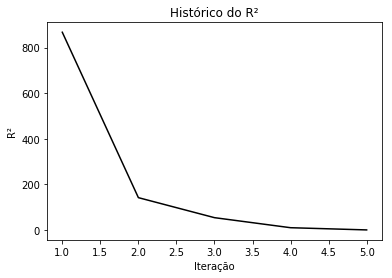

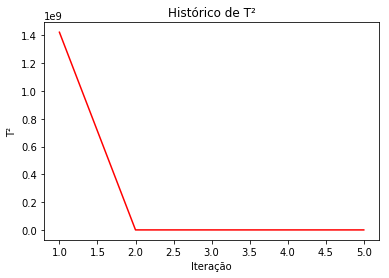

centróide resultante=
[[0.68809524 0.74952381 0.67761905 0.15761905]]


In [4]:
aglomedados, hist_R, hist_T = ward(dados, 10)
print('quantidade de clusters= '+str(len(aglomedados)))

plt.plot(np.arange(1, len(hist_R)+1), hist_R, 'black')
plt.title('Histórico do R²')
plt.xlabel('Iteração')
plt.ylabel('R²')
plt.show()

plt.plot(np.arange(1, len(hist_T)+1), hist_T ,'red')
plt.title('Histórico de T²')
plt.xlabel('Iteração')
plt.ylabel('T²')
plt.show()

centros_result = []
for a in aglomedados:
    centros_result.append(centro(a))
centros_result = np.array(centros_result)
print('centróide resultante=\n'+str(centros_result))

# Históricos de R e T

In [5]:
print('R²=\n'+str(np.round(hist_R,2)))
print('T²=\n'+str(np.round(hist_T,2)))

R²=
[866.99 141.53  53.75   9.67   0.  ]
T²=
[1.4232385e+09 4.4867800e+04 1.3054370e+04 3.4914000e+03 0.0000000e+00]


Vemos no gráfico de $R^{2}$ que ocorre uma variação drástica da iteração 1 para 2. Vamos executar o algoritmo até a 2ª iteração e ver no que dá.

In [6]:
aglomedados, hist_R, hist_T = ward(dados, 2)
print('quantidade de clusters= '+str(len(aglomedados)))

centros_result = []
for a in aglomedados:
    centros_result.append(centro(a))
centros_result = np.array(centros_result)
print('centróides resultantes=\n'+str(centros_result))

quantidade de clusters= 6
centróides resultantes=
[[ 0.9         0.97        0.9425      1.22      ]
 [ 0.8675      0.9375      0.8725      1.15      ]
 [ 0.63        0.73        0.6225      0.4025    ]
 [ 0.33666667  0.42333333  0.38333333 -1.53333333]
 [ 0.575       0.6         0.5225     -0.865     ]
 [ 0.775       0.76        0.62        0.14      ]]


# Históricos de R e T

In [7]:
print('R²=\n'+str(np.round(hist_R,2)))
print('T²=\n'+str(np.round(hist_T,2)))

R²=
[866.99 141.53]
T²=
[1.4232385e+09 4.4867800e+04]


# Grupos Formados

In [8]:
paises = {0:'Reino Unido', 1:'Austrália', 2:'Canadá', 3:'Estados Unidos' , 4:'Japão' ,5:'França' ,6:'Cingapura' ,7:'Argentina' ,8:'Uruguai' ,9:'Cuba' ,10:'Colômbia', 11:'Brasil', 12:'Paraguai', 13:'Egito', 14:'Nigéria', 15:'Senegal', 16:'Serra Leoa', 17:'Angola', 18:'Etiópia', 19:'Moçambique', 20:'China'}

rot = predict(dados, centros_result)
classes = []
for i in range(len(centros_result)):
    classes.append([])
for i in range(len(dados)):
    classes[rot[i]].append(paises[i])

for i in range(len(classes)):
    print('Classe '+str(i)+':\n'+str(classes[i]))

Classe 0:
['Austrália', 'Canadá', 'Estados Unidos', 'Japão', 'Cingapura']
Classe 1:
['Reino Unido', 'França', 'Uruguai']
Classe 2:
['Argentina', 'Brasil', 'Moçambique', 'China']
Classe 3:
['Nigéria', 'Serra Leoa', 'Angola']
Classe 4:
['Colômbia', 'Paraguai', 'Senegal', 'Etiópia']
Classe 5:
['Cuba', 'Egito']


Vamos executar apenas uma iteração do algoritmo.

In [9]:
aglomedados, hist_R, hist_T = ward(dados, 1)
print('quantidade de clusters= '+str(len(aglomedados)))

centros_result = []
for a in aglomedados:
    centros_result.append(centro(a))
centros_result = np.array(centros_result)
print('centróides resultantes=\n'+str(centros_result))

quantidade de clusters= 11
centróides resultantes=
[[ 0.9    0.985  0.935  1.25 ]
 [ 0.885  0.98   0.915  1.07 ]
 [ 0.9    0.955  0.95   1.19 ]
 [ 0.735  0.815  0.665  0.43 ]
 [ 0.39   0.36   0.385 -0.615]
 [ 0.775  0.76   0.62   0.14 ]
 [ 0.335  0.455  0.32  -1.31 ]
 [ 0.85   0.895  0.83   1.23 ]
 [ 0.76   0.84   0.66  -1.115]
 [ 0.525  0.645  0.58   0.375]
 [ 0.34   0.36   0.51  -1.98 ]]


# Grupos Formados

In [10]:
rot = predict(dados, centros_result)
classes = []
for i in range(len(centros_result)):
    classes.append([])
for i in range(len(dados)):
    classes[rot[i]].append(paises[i])

for i in range(len(classes)):
    print('Classe '+str(i)+':\n'+str(classes[i]))

Classe 0:
['Austrália', 'Canadá', 'Cingapura']
Classe 1:
['Reino Unido', 'França', 'Uruguai']
Classe 2:
['Estados Unidos', 'Japão']
Classe 3:
['Argentina', 'Brasil', 'China']
Classe 4:
['Senegal', 'Etiópia']
Classe 5:
['Cuba', 'Egito']
Classe 6:
['Nigéria', 'Serra Leoa']
Classe 7:
[]
Classe 8:
['Colômbia', 'Paraguai']
Classe 9:
['Moçambique']
Classe 10:
['Angola']
